In [1]:
import plotly.graph_objects as go
import networkx as nx

### Creating a graph
By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [2]:
G = nx.Graph()

### Adding nodes
Single node

In [3]:
G.add_node(1)

Or from an iterable

In [4]:
G.add_nodes_from([2, 3])

With node attributes

In [5]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

#### Second graph as a node in first graph
Graph **G** contains **H** as a node

In [6]:
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

### Adding edges

In [7]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

Add a list of edges

In [8]:
G.add_edges_from([(1, 2), (1, 3)])

In [9]:
G.number_of_nodes()

11

NetworkX ignores duplicate nodes and edges

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [11]:
G.number_of_edges()

4

### Examining elements of a graph
We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree.

In [12]:
list(G.nodes)

[1,
 2,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 'spam',
 's',
 'p',
 'a',
 'm']

In [13]:
list(G.edges)

[(1, 2), (1, 3), (2, 3), (3, 'm')]

In [14]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [15]:
G.degree[1]

2

### Removing elements from graph
One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from(),

In [16]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,
 'spam']

### Using graph constructors

In [17]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
H.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

#### What to use as nodes and edges
You might notice that nodes and edges are not specified as NetworkX objects. This leaves you free to use meaningful items as nodes and edges. The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1, n2, object=x)

As an example, n1 and n2 could be protein objects from the RCSB Protein Data Bank, and x could refer to an XML record of publications detailing experimental observations of their interaction.

### Accessing edges and neighbors
 Graph.edges, and Graph.adj, access to edges and neighbors is possible using subscript notation.

In [18]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [19]:
G[1][2]

{'color': 'yellow'}

In [20]:
G.edges[1, 2]

{'color': 'yellow'}

You can get/set the attributes of an edge using subscript notation if the edge already exists.


In [21]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

### Graph attributes

In [22]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [23]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [24]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [25]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G[1][2]

{'weight': 4.7, 'color': 'blue'}

### Directed Graph
The **DiGraph** class provides additional methods and properties specific to directed edges, e.g., DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors(), DiGraph.successors() etc. To allow algorithms to work with both classes easily, the directed versions of neighbors() is equivalent to successors() while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

In [26]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [27]:
DG.degree(1, weight='weight')

1.25

In [28]:
list(DG.successors(1))


[2]

In [29]:
list(DG.neighbors(1))


[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using **Graph.to_undirected()**

### Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. The **MultiGraph** and **MultiDiGraph** classes allow you to add the same edge twice, possibly with different edge data. This can be powerful for some applications, but many algorithms are not well defined on such graphs. Where results are well defined, e.g., MultiGraph.degree() we provide the function. Otherwise you should convert to a standard graph in a way that makes the measurement well defined.

In [30]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [31]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [32]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

#### List of graph operators
https://networkx.org/documentation/stable/tutorial.html#graph-generators-and-graph-operations

### Drawing graphs (using Matplotlib integration)
NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

In [33]:
import matplotlib.pyplot as plt


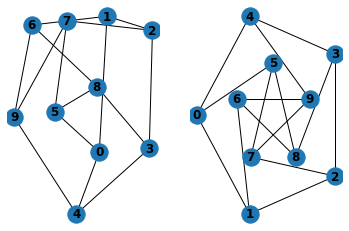

In [34]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


### Node Colormap


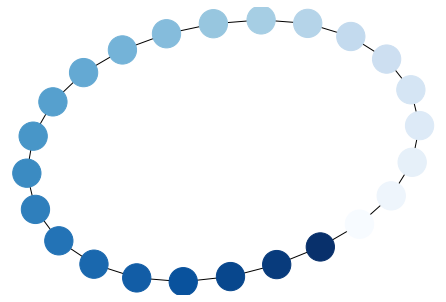

In [35]:
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

### Edge Colormap


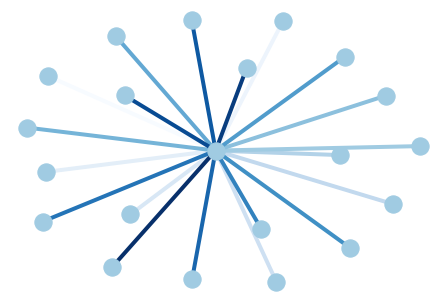

In [36]:
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

### Weighted Graph

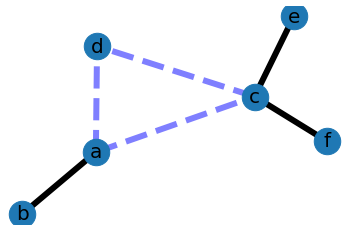

In [37]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis("off")
plt.show()

### Directed Graph

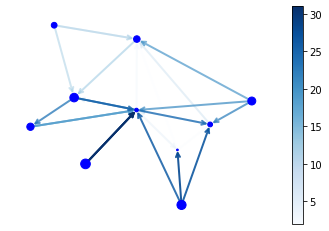

In [39]:
import matplotlib as mpl

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=plt.cm.Blues,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()